<b>1</b> OBTENCIÓN DE DATOS

In [9]:
import definirCorrelacionVariables
from matplotlib import pyplot
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl

data= definirCorrelacionVariables.getDataFromDataBase()

<b>2</b> pre PROCESAMIENTO DE DATA

In [10]:
dataframe,datos,dictGeneral = definirCorrelacionVariables.generarMatrizDatos(data,True)

373


3. OBTENCIÓN DE CORRELACIÓN MÚLTIPLE

GRAFICAS ENTRE VARIABLES

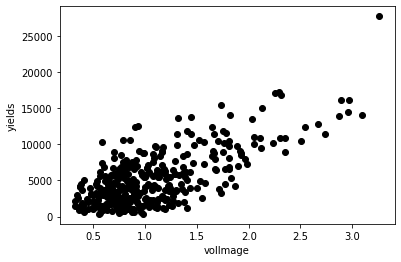

In [11]:
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(dataframe["volImage"],dataframe["yields"],c="black")
pyplot.xlabel("volImage")
pyplot.ylabel("yields")

pyplot.show()

SE CALCULA LA VARIABLE EL IAF
$Ac = \pi*r*g $

$g = \sqrt(h^2 + r^2) $

Se tiene que $r = Di/2$

$Ac = \pi*r*\sqrt(h^2 + r^2)$

$Ac = \pi*\frac{Di}{4}*\sqrt(4*h^2 + Di^2)$

Diametro

$diameter = 2*\sqrt(\frac{area}{\pi})$

In [12]:

import math
areaLateral = []
volumeFromDiameter = []
diametros=[]
for index,x in enumerate(datos.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametros.append(diametro)
    altura= datos.datosAlturaCalculada[index]/100
    valueAreaLateral=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    valueVolume = math.pi*diametro*diametro*altura*(1/6)
    volumeFromDiameter.append(valueVolume)
    areaLateral.append(valueAreaLateral)


<b style="color:orange;">LAI CALCULATED FROM EQUATION BASED ON VOLUME and AREA</b>

Se calcula el IAF usando Volumen Imagen y Yield

$IAF =  0.0134 + 2.7791 Vc$

Se calcula IAF usando Area Lateral y Yield

$IAF =  -0.5786 + 0.7896 Alat $


In [13]:

IAF_from_volume = definirCorrelacionVariables.objective(datos.datosVolumenImagen, 2.7791,0.0134)
IAF_from_area = definirCorrelacionVariables.objective(areaLateral, 0.7896,-0.5786)
d = {"latArea":areaLateral, "IAF_VOL":IAF_from_volume, "IAF_AREA":IAF_from_area}
dictGeneral.update(d)
dframeFinal = pd.DataFrame(data=dictGeneral)
pd.options.display.float_format = '{:,.2f}'.format
dataFrameCorrs=dframeFinal.loc[:,["yields","volImage","criMax","IAF_AREA","hImage","hMed","tviMin","ndviMax","cgreenviMax"]]
dfCors= dataFrameCorrs.corr(method="pearson")
dfCors.round(decimals=3)
print(dfCors)
dfCors.to_latex("CorrelationsTab.tex")

             yields  volImage  criMax  IAF_AREA  hImage  hMed  tviMin  \
yields         1.00      0.71    0.63      0.69    0.50  0.58   -0.39   
volImage       0.71      1.00    0.62      0.99    0.69  0.69   -0.46   
criMax         0.63      0.62    1.00      0.61    0.40  0.47   -0.65   
IAF_AREA       0.69      0.99    0.61      1.00    0.74  0.72   -0.45   
hImage         0.50      0.69    0.40      0.74    1.00  0.69   -0.39   
hMed           0.58      0.69    0.47      0.72    0.69  1.00   -0.35   
tviMin        -0.39     -0.46   -0.65     -0.45   -0.39 -0.35    1.00   
ndviMax        0.55      0.60    0.63      0.58    0.27  0.44   -0.30   
cgreenviMax    0.60      0.60    0.91      0.60    0.36  0.50   -0.55   

             ndviMax  cgreenviMax  
yields          0.55         0.60  
volImage        0.60         0.60  
criMax          0.63         0.91  
IAF_AREA        0.58         0.60  
hImage          0.27         0.36  
hMed            0.44         0.50  
tviMin         -0

<h1> USO DE CROSS VAL SCORE </h1>

<b style="color:red;">LINEAR REGRESSION SIMPLE VS MULTIPLE</b>




Non Standard Scaler

REGRESSION MODELS

In [33]:
from pickle import FALSE
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.isotonic import IsotonicRegression

cantCv=4
scoreDef = "r2" 
#scoreDef="accuracy"
#scoreDef = "explained_variance"
#scoreDef="neg_mean_absolute_error"
dfsX=dframeFinal.loc[:,["volImage"]]
dframeFinal.head()
X_volumenNoScaled= dfsX.values
y_multiple = dframeFinal.yields.values
sc_XMulti = MinMaxScaler()
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()

sc_X.fit_transform(X_volumenNoScaled)
yieldNoScaled=dframeFinal.yields.values.reshape(-1, 1)


from sklearn.model_selection import train_test_split


dfsX=dframeFinal.loc[:,["volImage","criMax","ndviMean","maxBlue","IAF_AREA","maxGreen","saviMax","tviMax","ndviMax","maxHistBluVal"]]
X_multipleNoScaled= dfsX.values
sc_XMulti.fit_transform(X_multipleNoScaled)
sc_y.fit_transform(yieldNoScaled)

valuesYeld=[]
linearSimple=[]
linearMultiple=[]
svrSimple=[]
svrMultiple=[]
sdgSimple=[]
sdgMultiple=[]
randomForestSimple=[]
randomForestMultiple=[]
decisionTreeSimple=[]
decisionTreeMultiple=[]
lassoSimple=[]
lassoMultiple=[]
baggingSimple=[]
baggingMultiple=[]
addaBostSimple=[]
addaBostMultiple=[]
for x in range(50):
    X_volumenNoScaledTrain, X_volumenNoScaledTest, yieldNoScaledTrain, yieldNoScaledTest = train_test_split(X_volumenNoScaled ,yieldNoScaled,test_size=0.3,shuffle=True)
    X_multipleNoScaledTrain, X_multipleNoScaledTest, yieldNoScaledTrain, yieldNoScaledTest = train_test_split(X_multipleNoScaled ,yieldNoScaled,test_size=0.3,shuffle=True)

    X_volumenTrain = sc_X.transform(X_volumenNoScaledTrain)
    X_volumenTest= sc_X.transform(X_volumenNoScaledTest)
    yieldTrain= sc_y.transform(yieldNoScaledTrain)
    yieldTest = sc_y.transform(yieldNoScaledTest)
    X_multipleTrain = sc_XMulti.transform(X_multipleNoScaledTrain)
    X_multipleTest = sc_XMulti.transform(X_multipleNoScaledTest)

    valuesYeld.append(np.mean(yieldNoScaledTest))

    model= LinearRegression()
    model.fit(X_volumenNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_volumenNoScaledTest)
    print( "Linear Regression Simple Predicted ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    linearSimple.append(np.mean(yPred))

    model= LinearRegression()
    model.fit(X_multipleNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_multipleNoScaledTest)
    print( "Linear Regression Multiple",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    linearMultiple.append(np.mean(yPred))


    model= SVR(kernel="linear")
    model.fit(X_volumenTrain ,yieldTrain.ravel())
    yPred=model.predict(X_volumenTest)
    print( "SVR Linear Simple",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    svrSimple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))


    model= SVR(kernel="linear")
    model.fit(X_multipleTrain ,yieldTrain.ravel())
    yPred=model.predict(X_multipleTest)
    print( "SVR Linear Multiple",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    svrMultiple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))

    model= linear_model.SGDRegressor(loss="squared_error")
    model.fit(X_volumenTrain ,yieldTrain.ravel())
    yPred=model.predict(X_volumenTest)
    print( "SGD Simple Regressor",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    sdgSimple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))

    model= linear_model.SGDRegressor(loss="squared_error")
    model.fit(X_multipleTrain ,yieldTrain.ravel())
    yPred=model.predict(X_multipleTest)
    print( "SGD Multi Regressor",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    sdgMultiple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))

    model= RandomForestRegressor()
    model.fit(X_volumenTrain ,yieldTrain.ravel())
    yPred=model.predict(X_volumenTest)
    print( "Simple Regressor Random forest",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    randomForestSimple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))


    model= RandomForestRegressor()
    model.fit(X_multipleTrain ,yieldTrain.ravel())
    yPred=model.predict(X_multipleTest)
    print( "Multi Regressor Random Forest",np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))), " Original ",np.mean(sc_y.inverse_transform(yieldTest.reshape(1, -1))))
    randomForestMultiple.append(np.mean(sc_y.inverse_transform(yPred.reshape(1, -1))))

    model= tree.DecisionTreeRegressor()
    model.fit(X_volumenNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_volumenNoScaledTest)
    print( "Decision Tree Simple Regressor ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    decisionTreeSimple.append(np.mean(yPred))

    model= tree.DecisionTreeRegressor()
    model.fit(X_multipleNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_multipleNoScaledTest)
    print( "Decision Tree Multi Regressor",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    decisionTreeMultiple.append(np.mean(yPred))


    model= linear_model.Lasso()
    model.fit(X_volumenNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_volumenNoScaledTest)
    print( "Lasso Regression Simple Predicted ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    lassoSimple.append(np.mean(yPred))


    model= linear_model.Lasso()
    model.fit(X_multipleNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_multipleNoScaledTest)
    print( "Lasso Regression Multiple ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    lassoMultiple.append(np.mean(yPred))

    model= ensemble.BaggingRegressor()
    model.fit(X_volumenNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_volumenNoScaledTest)
    print( "BaggingRegressor  Simple Predicted ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    baggingSimple.append(np.mean(yPred))


    model= ensemble.BaggingRegressor()
    model.fit(X_multipleNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_multipleNoScaledTest)
    print( "BaggingRegressor Multiple ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    baggingMultiple.append(np.mean(yPred))


    model= ensemble.AdaBoostRegressor(loss="square")
    model.fit(X_volumenNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_volumenNoScaledTest)
    print( "AdaBoostRegressor  Simple Predicted ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    addaBostSimple.append(np.mean(yPred))


    model= ensemble.AdaBoostRegressor(loss="square")
    model.fit(X_multipleNoScaledTrain ,yieldNoScaledTrain)
    yPred=model.predict(X_multipleNoScaledTest)
    print( "AdaBoostRegressor Multiple ",np.mean(yPred), " Original ",np.mean(yieldNoScaledTest))
    addaBostMultiple.append(np.mean(yPred))

print("Yield ", np.mean(valuesYeld))
print("linearSimple ", np.mean(linearSimple))
print("linearMultiple ", np.mean(linearMultiple))
print("svrSimple ", np.mean(svrSimple))
print("svrMultiple ", np.mean(svrMultiple))
print("sdgSimple ", np.mean(sdgSimple))
print("sdgMultiple ", np.mean(sdgMultiple))
print("randomForestSimple ", np.mean(randomForestSimple))
print("randomForestMultiple ", np.mean(randomForestMultiple))
print("decisionTreeSimple ", np.mean(decisionTreeSimple))
print("decisionTreeMultiple ", np.mean(decisionTreeMultiple))
print("lassoSimple ", np.mean(lassoSimple))
print("lassoMultiple ", np.mean(lassoMultiple))
print("baggingSimple ", np.mean(baggingSimple))
print("baggingMultiple ", np.mean(baggingMultiple))
print("addaBostSimple ", np.mean(addaBostSimple))
print("addaBostMultiple ", np.mean(addaBostMultiple))

Linear Regression Simple Predicted  5278.250449661915  Original  4971.1702682429695
Linear Regression Multiple 5021.079919400693  Original  4971.1702682429695
SVR Linear Simple 4826.33337697462  Original  4971.1702682429695
SVR Linear Multiple 5106.901372510082  Original  4971.1702682429695
SGD Simple Regressor 5135.986546646838  Original  4971.1702682429695
SGD Multi Regressor 5262.098091534657  Original  4971.1702682429695
Simple Regressor Random forest 4713.782083624922  Original  4971.1702682429695
Multi Regressor Random Forest 5103.734266003142  Original  4971.1702682429695
Decision Tree Simple Regressor  4773.297508829988  Original  4971.1702682429695
Decision Tree Multi Regressor 5379.5622368255235  Original  4971.1702682429695
Lasso Regression Simple Predicted  5278.0186242910795  Original  4971.1702682429695
Lasso Regression Multiple  4984.615969503078  Original  4971.1702682429695
BaggingRegressor  Simple Predicted  4657.960414236365  Original  4971.1702682429695
BaggingRegre

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5453.582956841822  Original  4971.1702682429695
Linear Regression Simple Predicted  5189.434074770595  Original  5244.201334068313
Linear Regression Multiple 5231.293309310752  Original  5244.201334068313
SVR Linear Simple 4954.580823544426  Original  5244.201334068313
SVR Linear Multiple 5191.121246400456  Original  5244.201334068313
SGD Simple Regressor 5069.005099069799  Original  5244.201334068313
SGD Multi Regressor 5408.8925905610895  Original  5244.201334068313
Simple Regressor Random forest 5434.073745235097  Original  5244.201334068313
Multi Regressor Random Forest 5280.578499995556  Original  5244.201334068313
Decision Tree Simple Regressor  5521.817961941999  Original  5244.201334068313
Decision Tree Multi Regressor 5431.50318960657  Original  5244.201334068313
Lasso Regression Simple Predicted  5189.223865066094  Original  5244.201334068313
Lasso Regression Multiple  5168.995230247506  Original  5244.201334068313
BaggingRegressor  Simple Predicte

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5167.636311158908  Original  5135.2298607674165
Linear Regression Multiple 5273.258924881905  Original  5135.2298607674165
SVR Linear Simple 4893.176136795276  Original  5135.2298607674165
SVR Linear Multiple 5273.390186681755  Original  5135.2298607674165
SGD Simple Regressor 5107.558673462566  Original  5135.2298607674165
SGD Multi Regressor 5263.511670107665  Original  5135.2298607674165
Simple Regressor Random forest 5116.674575000482  Original  5135.2298607674165
Multi Regressor Random Forest 5204.337043214281  Original  5135.2298607674165
Decision Tree Simple Regressor  5114.811684605199  Original  5135.2298607674165
Decision Tree Multi Regressor 5249.608235588152  Original  5135.2298607674165
Lasso Regression Simple Predicted  5167.9999478101245  Original  5135.2298607674165
Lasso Regression Multiple  5171.972415932246  Original  5135.2298607674165
BaggingRegressor  Simple Predicted  5041.661330599988  Original  5135.2298607674165
BaggingRegre

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5315.460181546904  Original  4846.094432267125
Linear Regression Multiple 5132.613253655679  Original  4846.094432267125
SVR Linear Simple 4951.389152599113  Original  4846.094432267125
SVR Linear Multiple 5225.48794503704  Original  4846.094432267125
SGD Simple Regressor 5224.267249560576  Original  4846.094432267125
SGD Multi Regressor 5519.948921153201  Original  4846.094432267125
Simple Regressor Random forest 5154.678587723816  Original  4846.094432267125
Multi Regressor Random Forest 5145.732152307128  Original  4846.094432267125
Decision Tree Simple Regressor  5270.147129524502  Original  4846.094432267125
Decision Tree Multi Regressor 4758.2937703011185  Original  4846.094432267125
Lasso Regression Simple Predicted  5315.304449198525  Original  4846.094432267125
Lasso Regression Multiple  5194.662486815834  Original  4846.094432267125
BaggingRegressor  Simple Predicted  5310.152371414451  Original  4846.094432267125
BaggingRegressor Multiple 

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5300.919651516146  Original  4863.391293292683
Linear Regression Multiple 4987.264385017479  Original  4863.391293292683
SVR Linear Simple 4901.789657535183  Original  4863.391293292683
SVR Linear Multiple 5002.024902070626  Original  4863.391293292683
SGD Simple Regressor 5226.8275119626005  Original  4863.391293292683
SGD Multi Regressor 5380.431489826149  Original  4863.391293292683
Simple Regressor Random forest 5269.067370666603  Original  4863.391293292683
Multi Regressor Random Forest 5130.987474271198  Original  4863.391293292683
Decision Tree Simple Regressor  5208.332614473223  Original  4863.391293292683
Decision Tree Multi Regressor 5231.965347623957  Original  4863.391293292683
Lasso Regression Simple Predicted  5300.90808988434  Original  4863.391293292683
Lasso Regression Multiple  4978.827376863091  Original  4863.391293292683
BaggingRegressor  Simple Predicted  5351.7021096485405  Original  4863.391293292683
BaggingRegressor Multiple

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5748.420188494316  Original  4863.391293292683
Linear Regression Simple Predicted  5328.719510500862  Original  4844.952219241402
Linear Regression Multiple 5250.747552654881  Original  4844.952219241402
SVR Linear Simple 4905.738160968516  Original  4844.952219241402
SVR Linear Multiple 5347.454013300255  Original  4844.952219241402
SGD Simple Regressor 5206.0731568682995  Original  4844.952219241402
SGD Multi Regressor 5514.135941915591  Original  4844.952219241402
Simple Regressor Random forest 5353.727034798738  Original  4844.952219241402
Multi Regressor Random Forest 5315.414042732313  Original  4844.952219241402
Decision Tree Simple Regressor  5440.360002941894  Original  4844.952219241402
Decision Tree Multi Regressor 5225.981414914457  Original  4844.952219241402
Lasso Regression Simple Predicted  5328.432908331658  Original  4844.952219241402
Lasso Regression Multiple  5250.70886611142  Original  4844.952219241402
BaggingRegressor  Simple Predicted

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5437.7898932650505  Original  4844.952219241402
Linear Regression Simple Predicted  5001.245299799667  Original  5606.28068892823
Linear Regression Multiple 5336.007853065462  Original  5606.28068892823
SVR Linear Simple 4534.95414683238  Original  5606.28068892823
SVR Linear Multiple 5608.514419158552  Original  5606.28068892823
SGD Simple Regressor 4928.684941829124  Original  5606.28068892823
SGD Multi Regressor 5583.16305982794  Original  5606.28068892823
Simple Regressor Random forest 4562.418980191914  Original  5606.28068892823
Multi Regressor Random Forest 5461.746795020277  Original  5606.28068892823
Decision Tree Simple Regressor  4343.954516577191  Original  5606.28068892823
Decision Tree Multi Regressor 5752.36226828342  Original  5606.28068892823
Lasso Regression Simple Predicted  5001.162590168424  Original  5606.28068892823
Lasso Regression Multiple  5389.160670937124  Original  5606.28068892823
BaggingRegressor  Simple Predicted  4569.1814256

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5304.863048553837  Original  4760.300045596525
Linear Regression Multiple 5197.782690022209  Original  4760.300045596525
SVR Linear Simple 4847.820845502596  Original  4760.300045596525
SVR Linear Multiple 5251.899814747274  Original  4760.300045596525
SGD Simple Regressor 5304.007884993108  Original  4760.300045596525
SGD Multi Regressor 5564.319934165951  Original  4760.300045596525
Simple Regressor Random forest 5008.460119376248  Original  4760.300045596525
Multi Regressor Random Forest 5226.540427022349  Original  4760.300045596525
Decision Tree Simple Regressor  4696.791245590616  Original  4760.300045596525
Decision Tree Multi Regressor 5100.252610563113  Original  4760.300045596525
Lasso Regression Simple Predicted  5305.2706040143075  Original  4760.300045596525
Lasso Regression Multiple  5273.125530379053  Original  4760.300045596525
BaggingRegressor  Simple Predicted  4977.083428407878  Original  4760.300045596525
BaggingRegressor Multiple

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Simple Regressor Random forest 5014.632206521106  Original  5226.4271921945465
Multi Regressor Random Forest 5432.252024480679  Original  5226.4271921945465
Decision Tree Simple Regressor  4867.387702376916  Original  5226.4271921945465
Decision Tree Multi Regressor 5126.381740036227  Original  5226.4271921945465
Lasso Regression Simple Predicted  5146.390210242428  Original  5226.4271921945465
Lasso Regression Multiple  5347.125616022191  Original  5226.4271921945465
BaggingRegressor  Simple Predicted  5147.683521097312  Original  5226.4271921945465
BaggingRegressor Multiple  5241.507987475365  Original  5226.4271921945465
AdaBoostRegressor  Simple Predicted  7264.468802124771  Original  5226.4271921945465
AdaBoostRegressor Multiple  5859.144005900635  Original  5226.4271921945465
Linear Regression Simple Predicted  5204.87278789684  Original  5040.268076831284
Linear Regression Multiple

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

 5106.729809165687  Original  5040.268076831284
SVR Linear Simple 4842.071528473183  Original  5040.268076831284
SVR Linear Multiple 5102.418473335295  Original  5040.268076831284
SGD Simple Regressor 5136.2895711288775  Original  5040.268076831284
SGD Multi Regressor 5475.810110241119  Original  5040.268076831284
Simple Regressor Random forest 4847.014745512105  Original  5040.268076831284
Multi Regressor Random Forest 5153.825966699022  Original  5040.268076831284
Decision Tree Simple Regressor  4652.598359907618  Original  5040.268076831284
Decision Tree Multi Regressor 5211.942182838437  Original  5040.268076831284
Lasso Regression Simple Predicted  5205.166574916546  Original  5040.268076831284
Lasso Regression Multiple  5010.445360454226  Original  5040.268076831284
BaggingRegressor  Simple Predicted  4820.486959622549  Original  5040.268076831284
BaggingRegressor Multiple  5173.702558073098  Original  5040.268076831284
AdaBoostRegressor  Simple Predicted  6998.248102293229  Orig

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5203.24531484506  Original  5048.7186090851255
Linear Regression Multiple 4982.0259177790185  Original  5048.7186090851255
SVR Linear Simple 4743.07747977948  Original  5048.7186090851255
SVR Linear Multiple 4985.568744649192  Original  5048.7186090851255
SGD Simple Regressor 5134.569760803522  Original  5048.7186090851255
SGD Multi Regressor 5229.825172753327  Original  5048.7186090851255
Simple Regressor Random forest 5897.043260996725  Original  5048.7186090851255
Multi Regressor Random Forest 5159.531401256433  Original  5048.7186090851255
Decision Tree Simple Regressor  5994.20982066859  Original  5048.7186090851255
Decision Tree Multi Regressor 5730.224598252834  Original  5048.7186090851255
Lasso Regression Simple Predicted  5203.44108759543  Original  5048.7186090851255
Lasso Regression Multiple  5030.4580152933495  Original  5048.7186090851255
BaggingRegressor  Simple Predicted  5563.295441982634  Original  5048.7186090851255
BaggingRegresso

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

SVR Linear Simple 4635.516162589153  Original  5533.7161033993925
SVR Linear Multiple 5135.577195362659  Original  5533.7161033993925
SGD Simple Regressor 4866.300326490275  Original  5533.7161033993925
SGD Multi Regressor 5309.147692093054  Original  5533.7161033993925
Simple Regressor Random forest 4982.8280796007075  Original  5533.7161033993925
Multi Regressor Random Forest 5269.7222996623295  Original  5533.7161033993925
Decision Tree Simple Regressor  4972.757214061998  Original  5533.716103399393
Decision Tree Multi Regressor 4966.693754175237  Original  5533.716103399393
Lasso Regression Simple Predicted  4938.263991406654  Original  5533.716103399393
Lasso Regression Multiple  5021.748831757742  Original  5533.716103399393
BaggingRegressor  Simple Predicted  5076.536111312727  Original  5533.716103399393
BaggingRegressor Multiple  5320.765094565179  Original  5533.716103399393
AdaBoostRegressor  Simple Predicted  6762.689360753335  Original  5533.716103399393
AdaBoostRegressor

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Simple Regressor Random forest 5854.997285660398  Original  5044.091128461535
Multi Regressor Random Forest 5089.570004567768  Original  5044.091128461535
Decision Tree Simple Regressor  6229.686273090805  Original  5044.091128461535
Decision Tree Multi Regressor 5091.649283948392  Original  5044.091128461535
Lasso Regression Simple Predicted  5223.1502993029235  Original  5044.091128461535
Lasso Regression Multiple  4860.6951886808065  Original  5044.091128461535
BaggingRegressor  Simple Predicted  5594.094471793879  Original  5044.091128461535
BaggingRegressor Multiple  5024.964106282901  Original  5044.091128461535
AdaBoostRegressor  Simple Predicted  7935.161256521198  Original  5044.091128461535
AdaBoostRegressor Multiple  5539.318776634756  Original  5044.091128461535
Linear Regression Simple Predicted  5213.2573764603485  Original  5146.4727293908445


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Multiple 4821.793736828443  Original  5146.4727293908445
SVR Linear Simple 4708.2726130145575  Original  5146.4727293908445
SVR Linear Multiple 5074.009813811233  Original  5146.4727293908445
SGD Simple Regressor 5050.103195491593  Original  5146.4727293908445
SGD Multi Regressor 5354.705517567744  Original  5146.4727293908445
Simple Regressor Random forest 5130.2835166522  Original  5146.4727293908445
Multi Regressor Random Forest 4909.957181751079  Original  5146.4727293908445
Decision Tree Simple Regressor  5417.865987732087  Original  5146.4727293908445
Decision Tree Multi Regressor 4616.447723069764  Original  5146.4727293908445
Lasso Regression Simple Predicted  5213.053653945585  Original  5146.4727293908445
Lasso Regression Multiple  4946.056983282061  Original  5146.4727293908445
BaggingRegressor  Simple Predicted  5093.834111561396  Original  5146.4727293908445
BaggingRegressor Multiple  4737.0841902708435  Original  5146.4727293908445
AdaBoostRegressor  Sim

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Simple Regressor Random forest 5086.550747860657  Original  4961.130632218791
Multi Regressor Random Forest 5098.275385471155  Original  4961.130632218791
Decision Tree Simple Regressor  5028.096513280194  Original  4961.130632218791
Decision Tree Multi Regressor 5026.466348017076  Original  4961.130632218791
Lasso Regression Simple Predicted  5265.236069589749  Original  4961.130632218791
Lasso Regression Multiple  5304.036051581444  Original  4961.130632218791


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

BaggingRegressor  Simple Predicted  5075.657144843615  Original  4961.130632218791
BaggingRegressor Multiple  5119.401260578821  Original  4961.130632218791
AdaBoostRegressor  Simple Predicted  7694.587081873401  Original  4961.130632218791
AdaBoostRegressor Multiple  5792.562022311371  Original  4961.130632218791
Linear Regression Simple Predicted  4894.268207063788  Original  5852.200927716826
Linear Regression Multiple 6022.178466014092  Original  5852.200927716826
SVR Linear Simple 4585.623268533624  Original  5852.200927716826
SVR Linear Multiple 5961.257839285036  Original  5852.200927716826
SGD Simple Regressor 4767.342435232212  Original  5852.200927716826
SGD Multi Regressor 5687.269485143533  Original  5852.200927716826
Simple Regressor Random forest 4457.977177291222  Original  5852.200927716826
Multi Regressor Random Forest 5844.873602551205  Original  5852.200927716826
Decision Tree Simple Regressor  4168.02836205841  Original  5852.200927716826
Decision Tree Multi Regress

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

 4853.0464978202635  Original  4705.533356342943
SVR Linear Simple 4896.655522353459  Original  4705.533356342943
SVR Linear Multiple 5130.386999574213  Original  4705.533356342943
SGD Simple Regressor 5276.384363816608  Original  4705.533356342943
SGD Multi Regressor 5394.402558629823  Original  4705.533356342943
Simple Regressor Random forest 5804.277544448729  Original  4705.533356342943
Multi Regressor Random Forest 5014.86600982204  Original  4705.533356342943
Decision Tree Simple Regressor  5815.368145004118  Original  4705.533356342943
Decision Tree Multi Regressor 5093.096371797606  Original  4705.533356342943
Lasso Regression Simple Predicted  5373.895700101065  Original  4705.533356342943
Lasso Regression Multiple  4987.126686086262  Original  4705.533356342943
BaggingRegressor  Simple Predicted  5947.912730676326  Original  4705.533356342943
BaggingRegressor Multiple  5055.405062120616  Original  4705.533356342943
AdaBoostRegressor  Simple Predicted  8056.066447854172  Origi

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5338.445550470883  Original  4705.533356342943
Linear Regression Simple Predicted  5202.280479849752  Original  5100.9661184136885
Linear Regression Multiple 5241.43126969719  Original  5100.9661184136885
SVR Linear Simple 4696.760194199642  Original  5100.9661184136885
SVR Linear Multiple 5410.96706716023  Original  5100.9661184136885
SGD Simple Regressor 5099.637862830242  Original  5100.9661184136885
SGD Multi Regressor 5531.705293896455  Original  5100.9661184136885
Simple Regressor Random forest 5106.271052930616  Original  5100.9661184136885
Multi Regressor Random Forest 5343.718290885234  Original  5100.9661184136885
Decision Tree Simple Regressor  5085.4915777788465  Original  5100.9661184136885
Decision Tree Multi Regressor 5565.658097449016  Original  5100.9661184136885
Lasso Regression Simple Predicted  5202.209538936129  Original  5100.9661184136885
Lasso Regression Multiple  5326.236802148499  Original  5100.9661184136885
BaggingRegressor  Simpl

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Simple Regressor Random forest 5040.42709072341  Original  4962.890473779022
Multi Regressor Random Forest 5100.689195014647  Original  4962.890473779022
Decision Tree Simple Regressor  4814.416858719038  Original  4962.890473779022
Decision Tree Multi Regressor 5242.489081666221  Original  4962.890473779022
Lasso Regression Simple Predicted  5271.091668439198  Original  4962.890473779022
Lasso Regression Multiple  5111.12539361447  Original  4962.890473779022
BaggingRegressor  Simple Predicted  5070.976407297959  Original  4962.890473779022
BaggingRegressor Multiple  4900.038577124372  Original  4962.890473779022
AdaBoostRegressor  Simple Predicted  7427.677699640489  Original  4962.890473779022


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5336.429085845257  Original  4962.890473779022
Linear Regression Simple Predicted  5189.085004168152  Original  5128.074852353199
Linear Regression Multiple 5486.352780843469  Original  5128.074852353199
SVR Linear Simple 4834.156897506241  Original  5128.074852353199
SVR Linear Multiple 5631.24912649665  Original  5128.074852353199
SGD Simple Regressor 5138.909569455144  Original  5128.074852353199
SGD Multi Regressor 5695.134777001726  Original  5128.074852353199
Simple Regressor Random forest 5326.891718077944  Original  5128.074852353199
Multi Regressor Random Forest 5515.726166029351  Original  5128.074852353199
Decision Tree Simple Regressor  5155.667093859637  Original  5128.074852353199
Decision Tree Multi Regressor 5195.96461781379  Original  5128.074852353199
Lasso Regression Simple Predicted  5188.766153514433  Original  5128.074852353199
Lasso Regression Multiple  5524.307561091484  Original  5128.074852353199
BaggingRegressor  Simple Predicted  

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5050.588344782584  Original  5442.597844151666
Linear Regression Multiple 5247.985012603023  Original  5442.597844151666
SVR Linear Simple 4563.589302318963  Original  5442.597844151666
SVR Linear Multiple 5220.5807025561035  Original  5442.597844151666
SGD Simple Regressor 4983.9564902719785  Original  5442.597844151666
SGD Multi Regressor 5402.389300027802  Original  5442.597844151666
Simple Regressor Random forest 4921.015265857117  Original  5442.597844151666
Multi Regressor Random Forest 5051.358642524995  Original  5442.597844151666
Decision Tree Simple Regressor  4971.372315639064  Original  5442.597844151666
Decision Tree Multi Regressor 4826.908727641006  Original  5442.597844151666
Lasso Regression Simple Predicted  5050.749711063139  Original  5442.597844151666
Lasso Regression Multiple  5207.673036260027  Original  5442.597844151666
BaggingRegressor  Simple Predicted  4753.952195001284  Original  5442.597844151666
BaggingRegressor Multipl

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

SGD Simple Regressor 4992.994710280914  Original  5252.433963729077
SGD Multi Regressor 5362.364760765411  Original  5252.433963729077
Simple Regressor Random forest 5015.6967534871965  Original  5252.433963729077
Multi Regressor Random Forest 4653.240536388373  Original  5252.433963729077
Decision Tree Simple Regressor  5090.239712929252  Original  5252.433963729077
Decision Tree Multi Regressor 4407.905395646449  Original  5252.433963729077
Lasso Regression Simple Predicted  5145.902411133394  Original  5252.433963729077
Lasso Regression Multiple  4978.444213290649  Original  5252.433963729077
BaggingRegressor  Simple Predicted  5235.060988319402  Original  5252.433963729077
BaggingRegressor Multiple  4737.620127959846  Original  5252.433963729077
AdaBoostRegressor  Simple Predicted  6985.916045421826  Original  5252.433963729077
AdaBoostRegressor Multiple  5228.944777857275  Original  5252.433963729077


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5176.083742885364  Original  5183.577501904928
Linear Regression Multiple 5171.656752835928  Original  5183.577501904928
SVR Linear Simple 4782.041839933818  Original  5183.577501904928
SVR Linear Multiple 5294.410910525424  Original  5183.577501904928
SGD Simple Regressor 5108.053750166788  Original  5183.577501904928
SGD Multi Regressor 5470.22812234713  Original  5183.577501904928
Simple Regressor Random forest 5172.352972800216  Original  5183.577501904928
Multi Regressor Random Forest 5396.622931895019  Original  5183.577501904928
Decision Tree Simple Regressor  5227.572783160936  Original  5183.577501904928
Decision Tree Multi Regressor 5591.966798867362  Original  5183.577501904928
Lasso Regression Simple Predicted  5175.732401925642  Original  5183.577501904928
Lasso Regression Multiple  5166.683231844361  Original  5183.577501904928
BaggingRegressor  Simple Predicted  5280.830181909718  Original  5183.577501904928
BaggingRegressor Multiple  

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

 4569.057141118389
SGD Multi Regressor 5437.4984401154115  Original  4569.057141118389
Simple Regressor Random forest 5305.029579752589  Original  4569.057141118389
Multi Regressor Random Forest 5027.5273805665865  Original  4569.057141118389
Decision Tree Simple Regressor  5435.441468814072  Original  4569.057141118388
Decision Tree Multi Regressor 4695.506451978926  Original  4569.057141118388
Lasso Regression Simple Predicted  5361.118765110335  Original  4569.057141118388
Lasso Regression Multiple  4953.793547455604  Original  4569.057141118388
BaggingRegressor  Simple Predicted  5316.786668281709  Original  4569.057141118388
BaggingRegressor Multiple  4926.269354936738  Original  4569.057141118388
AdaBoostRegressor  Simple Predicted  6993.2705295302485  Original  4569.057141118388
AdaBoostRegressor Multiple  5674.837109076217  Original  4569.057141118388


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5253.847440610013  Original  5037.07810816021
Linear Regression Multiple 5184.57812085213  Original  5037.07810816021
SVR Linear Simple 4856.546326805188  Original  5037.07810816021
SVR Linear Multiple 5228.50622442049  Original  5037.07810816021
SGD Simple Regressor 5171.024157199888  Original  5037.07810816021
SGD Multi Regressor 5443.468971251027  Original  5037.07810816021
Simple Regressor Random forest 5251.656465108443  Original  5037.07810816021
Multi Regressor Random Forest 4942.746212668391  Original  5037.07810816021
Decision Tree Simple Regressor  5301.7786948212815  Original  5037.07810816021
Decision Tree Multi Regressor 4953.6732502362265  Original  5037.07810816021
Lasso Regression Simple Predicted  5253.635599302413  Original  5037.07810816021
Lasso Regression Multiple  5174.5352937481375  Original  5037.07810816021
BaggingRegressor  Simple Predicted  5387.843546052584  Original  5037.07810816021
BaggingRegressor Multiple  4868.732493

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Simple Regressor Random forest 4994.482534124944  Original  5299.370172849886
Multi Regressor Random Forest 5103.512000229405  Original  5299.370172849886
Decision Tree Simple Regressor  4891.191340066418  Original  5299.370172849886
Decision Tree Multi Regressor 5234.232120426307  Original  5299.370172849886
Lasso Regression Simple Predicted  5113.690452255157  Original  5299.370172849886
Lasso Regression Multiple  5126.172577302226  Original  5299.370172849886
BaggingRegressor  Simple Predicted  4892.322952004763  Original  5299.370172849886
BaggingRegressor Multiple  5035.934050634554  Original  5299.370172849886
AdaBoostRegressor  Simple Predicted  7352.599143838626  Original  5299.370172849886
AdaBoostRegressor Multiple  5873.637165461545  Original  5299.370172849886
Linear Regression Simple Predicted  5080.20382030005  Original  5248.756359903918
Linear Regression Multiple

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

 4887.6839865458705  Original  5248.756359903918
SVR Linear Simple 4611.3945900683375  Original  5248.756359903918
SVR Linear Multiple 5093.814080801181  Original  5248.756359903918
SGD Simple Regressor 5037.349351617887  Original  5248.756359903918
SGD Multi Regressor 5311.265420205456  Original  5248.756359903918
Simple Regressor Random forest 4835.615667447547  Original  5248.756359903918
Multi Regressor Random Forest 5074.2725321321395  Original  5248.756359903918
Decision Tree Simple Regressor  4685.057036556478  Original  5248.756359903918
Decision Tree Multi Regressor 5244.446708828995  Original  5248.756359903918
Lasso Regression Simple Predicted  5080.500412556283  Original  5248.756359903918
Lasso Regression Multiple  4931.690401252306  Original  5248.756359903918
BaggingRegressor  Simple Predicted  4745.736496312007  Original  5248.756359903918
BaggingRegressor Multiple  5142.40636334772  Original  5248.756359903918
AdaBoostRegressor  Simple Predicted  7344.9669807180135  Or

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

 5144.339000741043
SVR Linear Multiple 5435.372153786756  Original  5144.339000741043
SGD Simple Regressor 5139.482102278555  Original  5144.339000741043
SGD Multi Regressor 5673.253245640432  Original  5144.339000741043
Simple Regressor Random forest 4931.729913048977  Original  5144.339000741043
Multi Regressor Random Forest 5634.849218034565  Original  5144.339000741043
Decision Tree Simple Regressor  4714.74345249167  Original  5144.339000741043
Decision Tree Multi Regressor 5765.852382692151  Original  5144.339000741043
Lasso Regression Simple Predicted  5170.044776417504  Original  5144.339000741043
Lasso Regression Multiple  5338.895803141927  Original  5144.339000741043
BaggingRegressor  Simple Predicted  4778.838972208124  Original  5144.339000741043
BaggingRegressor Multiple  5784.517681086058  Original  5144.339000741043
AdaBoostRegressor  Simple Predicted  7293.547025014243  Original  5144.339000741043


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  6189.284606953856  Original  5144.339000741043
Linear Regression Simple Predicted  5167.450994377932  Original  5219.635660679572
Linear Regression Multiple 4949.805999639887  Original  5219.635660679572
SVR Linear Simple 4798.0241211007715  Original  5219.635660679572
SVR Linear Multiple 5000.746502098671  Original  5219.635660679572
SGD Simple Regressor 5006.612845444614  Original  5219.635660679572
SGD Multi Regressor 5356.784122905063  Original  5219.635660679572
Simple Regressor Random forest 5887.443981290528  Original  5219.635660679572
Multi Regressor Random Forest 5013.8731245364115  Original  5219.635660679572
Decision Tree Simple Regressor  6411.445812986138  Original  5219.635660679572
Decision Tree Multi Regressor 5195.575641494036  Original  5219.635660679572
Lasso Regression Simple Predicted  5167.272781291808  Original  5219.635660679572
Lasso Regression Multiple  4968.134836718443  Original  5219.635660679572
BaggingRegressor  Simple Predict

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

SVR Linear Multiple 4973.175716670508  Original  5084.113498530632
SGD Simple Regressor 5099.742207657832  Original  5084.113498530632
SGD Multi Regressor 5230.68489909775  Original  5084.113498530632
Simple Regressor Random forest 5928.79331911721  Original  5084.113498530632
Multi Regressor Random Forest 4984.240509250721  Original  5084.113498530632
Decision Tree Simple Regressor  6285.816004441345  Original  5084.113498530632
Decision Tree Multi Regressor 5328.9328720879175  Original  5084.113498530632
Lasso Regression Simple Predicted  5180.218707182366  Original  5084.113498530632
Lasso Regression Multiple  4823.891352753215  Original  5084.113498530632
BaggingRegressor  Simple Predicted  6254.2782016340625  Original  5084.113498530632
BaggingRegressor Multiple  4989.383723372346  Original  5084.113498530632
AdaBoostRegressor  Simple Predicted  7661.577680990145  Original  5084.113498530632
AdaBoostRegressor Multiple  5422.407881565334  Original  5084.113498530632
Linear Regressi

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

SGD Simple Regressor 5077.718310240229  Original  5166.657350394043
SGD Multi Regressor 5414.545809956207  Original  5166.657350394043
Simple Regressor Random forest 5018.436809270088  Original  5166.657350394043
Multi Regressor Random Forest 5059.974877989223  Original  5166.657350394043
Decision Tree Simple Regressor  4858.999677986731  Original  5166.657350394043
Decision Tree Multi Regressor 5087.410099240694  Original  5166.657350394043
Lasso Regression Simple Predicted  5169.146561171877  Original  5166.657350394043
Lasso Regression Multiple  4996.9563903448225  Original  5166.657350394043
BaggingRegressor  Simple Predicted  4999.095997444684  Original  5166.657350394043
BaggingRegressor Multiple  5026.256365052917  Original  5166.657350394043
AdaBoostRegressor  Simple Predicted  6776.42104384356  Original  5166.657350394043
AdaBoostRegressor Multiple  5457.3717899408275  Original  5166.657350394043


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5368.258637428183  Original  4696.302237487539
Linear Regression Multiple 5210.353885588105  Original  4696.302237487539
SVR Linear Simple 5009.1481327123265  Original  4696.302237487539
SVR Linear Multiple 5241.071774754791  Original  4696.302237487539
SGD Simple Regressor 5312.626131382775  Original  4696.302237487539
SGD Multi Regressor 5433.766252428316  Original  4696.302237487539
Simple Regressor Random forest 5580.573704054673  Original  4696.302237487539
Multi Regressor Random Forest 5106.056004425754  Original  4696.302237487539
Decision Tree Simple Regressor  5598.802643934907  Original  4696.302237487539
Decision Tree Multi Regressor 5058.137541416149  Original  4696.302237487539
Lasso Regression Simple Predicted  5368.484191789423  Original  4696.302237487539
Lasso Regression Multiple  5111.537128695699  Original  4696.302237487539
BaggingRegressor  Simple Predicted  5697.87375591715  Original  4696.302237487539
BaggingRegressor Multiple 

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  4838.213060469476  Original  5927.312053291894
Linear Regression Multiple 5345.528377059556  Original  5927.312053291894
SVR Linear Simple 4447.818308431136  Original  5927.312053291894
SVR Linear Multiple 5340.095584797252  Original  5927.312053291894
SGD Simple Regressor 4761.279003069642  Original  5927.312053291894
SGD Multi Regressor 5281.611133774107  Original  5927.312053291894
Simple Regressor Random forest 4872.733216731949  Original  5927.312053291894
Multi Regressor Random Forest 5195.1898777879605  Original  5927.312053291894
Decision Tree Simple Regressor  4879.417548027336  Original  5927.312053291894
Decision Tree Multi Regressor 5395.660089434411  Original  5927.312053291894
Lasso Regression Simple Predicted  4838.484966608467  Original  5927.312053291894
Lasso Regression Multiple  5298.344844582724  Original  5927.312053291894
BaggingRegressor  Simple Predicted  4786.481625753841  Original  5927.312053291894
BaggingRegressor Multiple

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5165.933241141227  Original  5163.622789817723
Linear Regression Multiple 4932.8684627359535  Original  5163.622789817723
SVR Linear Simple 4810.322217463726  Original  5163.622789817723
SVR Linear Multiple 5086.877840878374  Original  5163.622789817723
SGD Simple Regressor 5086.721138570726  Original  5163.622789817723
SGD Multi Regressor 5461.671119463155  Original  5163.622789817723
Simple Regressor Random forest 5013.200454107979  Original  5163.622789817723
Multi Regressor Random Forest 5296.811765342731  Original  5163.622789817723
Decision Tree Simple Regressor  5063.165781531709  Original  5163.622789817723
Decision Tree Multi Regressor 5308.070171587203  Original  5163.622789817723
Lasso Regression Simple Predicted  5166.09485321361  Original  5163.622789817723
Lasso Regression Multiple  4984.562378447343  Original  5163.622789817723
BaggingRegressor  Simple Predicted  5178.280450333324  Original  5163.622789817723
BaggingRegressor Multiple 

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

SVR Linear Multiple 5560.277474087006  Original  5573.513755230034
SGD Simple Regressor 4904.755064332675  Original  5573.513755230034
SGD Multi Regressor 5474.7263341513735  Original  5573.513755230034
Simple Regressor Random forest 5139.961292854081  Original  5573.513755230034
Multi Regressor Random Forest 5555.223920948192  Original  5573.513755230034
Decision Tree Simple Regressor  5299.020502936122  Original  5573.513755230034
Decision Tree Multi Regressor 5428.43596943421  Original  5573.513755230034
Lasso Regression Simple Predicted  4995.449097683741  Original  5573.513755230034
Lasso Regression Multiple  5423.7841697238155  Original  5573.513755230034
BaggingRegressor  Simple Predicted  5125.304762061105  Original  5573.513755230034
BaggingRegressor Multiple  5470.513496067618  Original  5573.513755230034
AdaBoostRegressor  Simple Predicted  6119.902143351105  Original  5573.513755230034


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5843.40417566832  Original  5573.513755230034
Linear Regression Simple Predicted  5320.519434009635  Original  4759.551232197451
Linear Regression Multiple 4689.131689789846  Original  4759.551232197451
SVR Linear Simple 4793.83599263412  Original  4759.551232197451
SVR Linear Multiple 4819.993242941518  Original  4759.551232197451
SGD Simple Regressor 5299.611300209302  Original  4759.551232197451
SGD Multi Regressor 5284.606271888135  Original  4759.551232197451
Simple Regressor Random forest 5219.386353264033  Original  4759.551232197451
Multi Regressor Random Forest 4735.061566639645  Original  4759.551232197451
Decision Tree Simple Regressor  5308.988879226868  Original  4759.551232197451
Decision Tree Multi Regressor 4993.392017443862  Original  4759.551232197451
Lasso Regression Simple Predicted  5320.778619630926  Original  4759.551232197451
Lasso Regression Multiple  4710.440102390166  Original  4759.551232197451
BaggingRegressor  Simple Predicted  

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  4968.741402683825  Original  4759.551232197451
Linear Regression Simple Predicted  5106.810171313597  Original  5238.78735394478
Linear Regression Multiple 5085.315273279672  Original  5238.78735394478
SVR Linear Simple 4706.739821719084  Original  5238.78735394478
SVR Linear Multiple 5071.301237786472  Original  5238.78735394478
SGD Simple Regressor 5097.559360392575  Original  5238.78735394478
SGD Multi Regressor 5257.835376617707  Original  5238.78735394478
Simple Regressor Random forest 4960.195667332585  Original  5238.78735394478
Multi Regressor Random Forest 4863.037919338752  Original  5238.78735394478
Decision Tree Simple Regressor  5094.108657257681  Original  5238.78735394478
Decision Tree Multi Regressor 4781.971206498599  Original  5238.78735394478
Lasso Regression Simple Predicted  5107.273837775465  Original  5238.78735394478
Lasso Regression Multiple  5032.376060078405  Original  5238.78735394478
BaggingRegressor  Simple Predicted  4953.85230

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Simple Regressor Random forest 5202.130433412427  Original  5138.621518063354
Multi Regressor Random Forest 5338.3911415966595  Original  5138.621518063354
Decision Tree Simple Regressor  5239.259675623094  Original  5138.621518063354
Decision Tree Multi Regressor 5528.280722160719  Original  5138.621518063354
Lasso Regression Simple Predicted  5235.117995050497  Original  5138.621518063354
Lasso Regression Multiple  5184.247141841516  Original  5138.621518063354
BaggingRegressor  Simple Predicted  5257.544229379078  Original  5138.621518063354
BaggingRegressor Multiple  5291.4240199351  Original  5138.621518063354
AdaBoostRegressor  Simple Predicted  7691.8698250561365  Original  5138.621518063354


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5687.775066779704  Original  5138.621518063354
Linear Regression Simple Predicted  5277.247643652644  Original  4923.233026092522
Linear Regression Multiple 4880.2318473104  Original  4923.233026092522
SVR Linear Simple 4868.463237144088  Original  4923.233026092522
SVR Linear Multiple 5071.171853550787  Original  4923.233026092522
SGD Simple Regressor 5228.27981580793  Original  4923.233026092522
SGD Multi Regressor 5481.399311432649  Original  4923.233026092522
Simple Regressor Random forest 5820.105036896659  Original  4923.233026092522
Multi Regressor Random Forest 5173.510213569962  Original  4923.233026092522
Decision Tree Simple Regressor  5979.822003369715  Original  4923.233026092522
Decision Tree Multi Regressor 4916.346034583242  Original  4923.233026092522
Lasso Regression Simple Predicted  5277.149758158871  Original  4923.233026092522
Lasso Regression Multiple  4895.167151733108  Original  4923.233026092522
BaggingRegressor  Simple Predicted  6

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5469.642572732661  Original  4923.233026092522
Linear Regression Simple Predicted  5309.9060313652135  Original  4840.408661773146
Linear Regression Multiple 5071.281798034948  Original  4840.408661773146
SVR Linear Simple 4839.494341779784  Original  4840.408661773146
SVR Linear Multiple 5108.827754656156  Original  4840.408661773146
SGD Simple Regressor 5274.729868147582  Original  4840.408661773146
SGD Multi Regressor 5525.860609322059  Original  4840.408661773146
Simple Regressor Random forest 5428.537003581494  Original  4840.408661773146
Multi Regressor Random Forest 5251.312390079227  Original  4840.408661773146
Decision Tree Simple Regressor  5276.890284760188  Original  4840.408661773146
Decision Tree Multi Regressor 5628.373441402883  Original  4840.408661773146
Lasso Regression Simple Predicted  5309.966976701384  Original  4840.408661773146
Lasso Regression Multiple  5047.053145999933  Original  4840.408661773146
BaggingRegressor  Simple Predicte

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

4919.3112045101425
Linear Regression Multiple 5373.237492116792  Original  4919.3112045101425
SVR Linear Simple 4922.524529801822  Original  4919.3112045101425
SVR Linear Multiple 5407.563955788401  Original  4919.3112045101425
SGD Simple Regressor 5204.437692051847  Original  4919.3112045101425
SGD Multi Regressor 5495.941398263697  Original  4919.3112045101425
Simple Regressor Random forest 5385.169965772354  Original  4919.3112045101425
Multi Regressor Random Forest 5272.195019292752  Original  4919.3112045101425
Decision Tree Simple Regressor  5312.4379159796745  Original  4919.3112045101425
Decision Tree Multi Regressor 5195.056425355498  Original  4919.3112045101425
Lasso Regression Simple Predicted  5275.17833913343  Original  4919.3112045101425
Lasso Regression Multiple  5293.21204466142  Original  4919.3112045101425
BaggingRegressor  Simple Predicted  5332.216272439997  Original  4919.3112045101425
BaggingRegressor Multiple  5291.894115886875  Original  4919.3112045101425
AdaB

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5570.509673808491  Original  4919.3112045101425
Linear Regression Simple Predicted  5091.375395375236  Original  5373.645704346337
Linear Regression Multiple 5346.897761007114  Original  5373.645704346337
SVR Linear Simple 4717.83459971632  Original  5373.645704346337
SVR Linear Multiple 5412.242590598362  Original  5373.645704346337
SGD Simple Regressor 4963.480049614306  Original  5373.645704346337
SGD Multi Regressor 5527.568656275332  Original  5373.645704346337
Simple Regressor Random forest 4894.423343127064  Original  5373.645704346337
Multi Regressor Random Forest 5378.802963561951  Original  5373.645704346337
Decision Tree Simple Regressor  4814.341061710984  Original  5373.645704346337
Decision Tree Multi Regressor 5737.551449480481  Original  5373.645704346337
Lasso Regression Simple Predicted  5091.198522677288  Original  5373.645704346337
Lasso Regression Multiple  5383.724331067943  Original  5373.645704346337
BaggingRegressor  Simple Predicted

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5132.459740972901  Original  5272.39155503378
Linear Regression Multiple 5335.877344742571  Original  5272.39155503378
SVR Linear Simple 4663.793695630602  Original  5272.39155503378
SVR Linear Multiple 5258.91356047138  Original  5272.39155503378
SGD Simple Regressor 5004.424888655422  Original  5272.39155503378
SGD Multi Regressor 5556.143173876031  Original  5272.39155503378
Simple Regressor Random forest 5372.714760244272  Original  5272.39155503378
Multi Regressor Random Forest 5622.554775624098  Original  5272.39155503378
Decision Tree Simple Regressor  5451.842743567836  Original  5272.39155503378
Decision Tree Multi Regressor 5523.475817737211  Original  5272.39155503378
Lasso Regression Simple Predicted  5132.393486197198  Original  5272.39155503378
Lasso Regression Multiple  5283.417850852079  Original  5272.39155503378
BaggingRegressor  Simple Predicted  5448.035179017655  Original  5272.39155503378
BaggingRegressor Multiple  5655.95822581

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5217.308740225232  Original  5060.417703670204
Linear Regression Multiple 5049.2585923543975  Original  5060.417703670204
SVR Linear Simple 4891.611355616701  Original  5060.417703670204
SVR Linear Multiple 5203.864869766008  Original  5060.417703670204
SGD Simple Regressor 5096.760055929348  Original  5060.417703670204
SGD Multi Regressor 5476.533497711075  Original  5060.417703670204
Simple Regressor Random forest 5179.708571267599  Original  5060.417703670204
Multi Regressor Random Forest 5266.7868462679635  Original  5060.417703670204
Decision Tree Simple Regressor  5195.696813942653  Original  5060.417703670204
Decision Tree Multi Regressor 5074.872833945973  Original  5060.417703670204
Lasso Regression Simple Predicted  5217.194966783144  Original  5060.417703670204
Lasso Regression Multiple  5220.86902413965  Original  5060.417703670204
BaggingRegressor  Simple Predicted  5077.235628963467  Original  5060.417703670204
BaggingRegressor Multiple

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5289.032905048085  Original  4894.824282039932
Linear Regression Multiple 5195.839738431626  Original  4894.824282039932
SVR Linear Simple 4858.2513534790505  Original  4894.824282039932
SVR Linear Multiple 5169.007157337984  Original  4894.824282039932
SGD Simple Regressor 5219.858326853681  Original  4894.824282039932
SGD Multi Regressor 5467.276210676137  Original  4894.824282039932
Simple Regressor Random forest 5038.275274905119  Original  4894.824282039932
Multi Regressor Random Forest 5269.805342143934  Original  4894.824282039932
Decision Tree Simple Regressor  4891.514977682964  Original  4894.824282039932
Decision Tree Multi Regressor 5218.41661692425  Original  4894.824282039932
Lasso Regression Simple Predicted  5289.00491380608  Original  4894.824282039932
Lasso Regression Multiple  5103.554162343373  Original  4894.824282039932
BaggingRegressor  Simple Predicted  5082.092532586256  Original  4894.824282039932
BaggingRegressor Multiple  

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5546.752659014675  Original  4894.824282039932
Linear Regression Simple Predicted  5142.578133834262  Original  5251.453895719113
Linear Regression Multiple 5218.916827486905  Original  5251.453895719113
SVR Linear Simple 4604.143474404383  Original  5251.453895719113
SVR Linear Multiple 5290.1592364591215  Original  5251.453895719113
SGD Simple Regressor 5004.6547918441665  Original  5251.453895719113
SGD Multi Regressor 5264.085406700618  Original  5251.453895719113
Simple Regressor Random forest 5265.979808323056  Original  5251.453895719113
Multi Regressor Random Forest 5144.793433361326  Original  5251.453895719113
Decision Tree Simple Regressor  5299.915387854292  Original  5251.453895719113
Decision Tree Multi Regressor 5118.297885359804  Original  5251.453895719113
Lasso Regression Simple Predicted  5142.509658191432  Original  5251.453895719113
Lasso Regression Multiple  5179.827573190546  Original  5251.453895719113
BaggingRegressor  Simple Predict

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5581.6616705528695  Original  5251.453895719113
Linear Regression Simple Predicted  5032.316503763147  Original  5498.390123204902
Linear Regression Multiple 4898.134593813206  Original  5498.390123204902
SVR Linear Simple 4780.047585840227  Original  5498.390123204902
SVR Linear Multiple 4913.861421124292  Original  5498.390123204902
SGD Simple Regressor 4961.379643521909  Original  5498.390123204902
SGD Multi Regressor 5170.857801937784  Original  5498.390123204902
Simple Regressor Random forest 5245.001341511097  Original  5498.390123204902
Multi Regressor Random Forest 5043.994490142972  Original  5498.390123204902
Decision Tree Simple Regressor  5169.582356411364  Original  5498.390123204902
Decision Tree Multi Regressor 5315.73237469707  Original  5498.390123204902
Lasso Regression Simple Predicted  5032.254673265309  Original  5498.390123204902
Lasso Regression Multiple  4806.056552273433  Original  5498.390123204902
BaggingRegressor  Simple Predicted

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Simple Regressor Random forest 4810.942025422541  Original  5308.678763773552
Multi Regressor Random Forest 5679.780596730461  Original  5308.678763773552
Decision Tree Simple Regressor  4927.524662707817  Original  5308.678763773552
Decision Tree Multi Regressor 5571.119872547106  Original  5308.678763773552
Lasso Regression Simple Predicted  5127.108145862874  Original  5308.678763773552
Lasso Regression Multiple  5511.707265256734  Original  5308.678763773552
BaggingRegressor  Simple Predicted  5012.957750207453  Original  5308.678763773552
BaggingRegressor Multiple  5618.680593438317  Original  5308.678763773552
AdaBoostRegressor  Simple Predicted  6636.544140468774  Original  5308.678763773552


c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5656.559919731511  Original  5308.678763773552
Linear Regression Simple Predicted  5122.635817957018  Original  5176.988410543977
Linear Regression Multiple 5227.605022797477  Original  5176.988410543977
SVR Linear Simple 4703.593512208163  Original  5176.988410543977
SVR Linear Multiple 5159.185407218164  Original  5176.988410543977
SGD Simple Regressor 5060.20779955212  Original  5176.988410543977
SGD Multi Regressor 5424.0758885453315  Original  5176.988410543977
Simple Regressor Random forest 5087.686730738926  Original  5176.988410543977
Multi Regressor Random Forest 5198.313866303311  Original  5176.988410543977
Decision Tree Simple Regressor  5017.525310844448  Original  5176.988410543977
Decision Tree Multi Regressor 5000.675866621362  Original  5176.988410543977
Lasso Regression Simple Predicted  5122.833305071064  Original  5176.988410543977
Lasso Regression Multiple  5207.830915587743  Original  5176.988410543977
BaggingRegressor  Simple Predicted

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

Linear Regression Simple Predicted  5077.063022346071  Original  5557.08233517089
Linear Regression Multiple 5204.345000770889  Original  5557.08233517089
SVR Linear Simple 4569.956957844677  Original  5557.08233517089
SVR Linear Multiple 5292.920874879915  Original  5557.08233517089
SGD Simple Regressor 4973.902633586796  Original  5557.08233517089
SGD Multi Regressor 5315.108654364904  Original  5557.08233517089
Simple Regressor Random forest 4801.135023741249  Original  5557.08233517089
Multi Regressor Random Forest 5291.350968025233  Original  5557.08233517089
Decision Tree Simple Regressor  4687.037850093223  Original  5557.08233517089
Decision Tree Multi Regressor 5268.208705457704  Original  5557.08233517089
Lasso Regression Simple Predicted  5076.657206584978  Original  5557.08233517089
Lasso Regression Multiple  5277.470642411426  Original  5557.08233517089
BaggingRegressor  Simple Predicted  5050.232530813587  Original  5557.08233517089
BaggingRegressor Multiple  5217.1513493

c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Julian Bolanos\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

AdaBoostRegressor Multiple  5863.9933906301685  Original  5557.08233517089
Yield  5144.88527101333
linearSimple  5180.0887003192
linearMultiple  5148.900774921188
svrSimple  4774.1017035951945
svrMultiple  5227.536733166024
sdgSimple  5096.078250266326
sdgMultiple  5427.031226267107
randomForestSimple  5174.843803829754
randomForestMultiple  5208.545385923118
decisionTreeSimple  5179.032798607583
decisionTreeMultiple  5226.57872555331
lassoSimple  5180.085488836366
lassoMultiple  5149.127987345993
baggingSimple  5196.410807201045
baggingMultiple  5200.674582959745
addaBostSimple  7099.939505798282
addaBostMultiple  5625.4639544527
